# CHALLENGE STATEMENT


# PART 1: Prepare Data

In [66]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.metrics import confusion_matrix, recall_score, accuracy_score, precision_score

%matplotlib inline
import matplotlib.pyplot as plt

# hola

# PART 3: Exploratory component

In [67]:
data_exp=pd.read_csv('BikeSharing_Bluebikes2022.csv')
data_exp.set_index('starttime')

,Unnamed: 0,tripduration,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,postal code
starttime,,,,,,,,,,,,,,
2022-01-01 00:00:25.1660,0,597,2022-01-01 00:10:22.1920,178,MIT Pacific St at Purrington St,42.359573,-71.101295,74,Harvard Square at Mass Ave/ Dunster,42.373268,-71.118579,4923,Subscriber,02139
2022-01-01 00:00:40.4300,1,411,2022-01-01 00:07:32.1980,189,Kendall T,42.362428,-71.084955,178,MIT Pacific St at Purrington St,42.359573,-71.101295,3112,Subscriber,02139
2022-01-01 00:00:54.8180,2,476,2022-01-01 00:08:51.6680,94,Main St at Austin St,42.375603,-71.064608,356,Charlestown Navy Yard,42.374125,-71.054812,6901,Customer,02124
2022-01-01 00:01:01.6080,3,466,2022-01-01 00:08:48.2350,94,Main St at Austin St,42.375603,-71.064608,356,Charlestown Navy Yard,42.374125,-71.054812,5214,Customer,02124
2022-01-01 00:01:06.0520,4,752,2022-01-01 00:13:38.2300,19,Park Dr at Buswell St,42.347241,-71.105301,41,Packard's Corner - Commonwealth Ave at Brighto...,42.352261,-71.123831,2214,Subscriber,02215
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-31 23:59:44.9190,487196,591,2022-09-01 00:09:36.0490,67,MIT at Mass Ave / Amherst St,42.358100,-71.093198,84,CambridgeSide Galleria - CambridgeSide PL at L...,42.367074,-71.076793,6399,Subscriber,02139
2022-08-31 23:59:45.7290,487197,631,2022-09-01 00:10:17.2070,380,Mass Ave at Albany St,42.361358,-71.096703,381,Inman Square at Springfield St.,42.374267,-71.100265,8075,Subscriber,NaN
2022-08-31 23:59:48.6080,487198,521,2022-09-01 00:08:30.3250,150,State Street at Channel Center,42.344137,-71.052608,26,Washington St at Waltham St,42.341575,-71.068904,2880,Subscriber,02118


In [68]:
nat_hol = ['2022-01-01','2022-01-17','2022-02-21','2022-04-17','2022-04-18','2022-05-08','2022-05-30','2022-06-19','2022-06-20','2022-07-04']

data_exp['is_Holiday'] = [ 1 if data_exp.iloc[i]['starttime'][0:10] in nat_hol else 0 for i in range(len(data_exp))]


In [69]:
data_w = pd.read_csv("Boston 2022-01-01 to 2022-08-31.csv")
drop = ['dew', 'sunrise','sunset','moonphase','conditions', 'description','stations','sealevelpressure',
'windgust','severerisk', 'uvindex', 'solarenergy', 'solarradiation','preciptype','winddir','name']
data_w = data_w.drop(columns = drop)
data_w['datetime'] = pd.to_datetime(data_w['datetime'])

In [70]:
# for column in data_w.columns:
#     data_exp[column] = [data_w[column] if data_exp.iloc[i]['starttime'][0:10] == data_w['datetime'] else 0 for i in range(len(data_exp))]
from datetime import datetime as dt

data_exp['starttime'] = pd.to_datetime(data_exp['starttime'], format='%Y-%m-%d %H:%M:%S')
data_exp['datetime'] = pd.to_datetime(data_exp['starttime']).dt.date
data_exp['datetime'] = pd.to_datetime(data_exp['datetime'])

data_merge = data_exp.merge(data_w, how='left', on='datetime')

In [71]:
data_merge.columns
data_merge = data_merge.drop(columns=(['Unnamed: 0']))
# data_merge = data_merge.set_index('datetime')


In [72]:
data_merge


,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,...,humidity,precip,precipprob,precipcover,snow,snowdepth,windspeed,cloudcover,visibility,icon
0,597,2022-01-01 00:00:25.166,2022-01-01 00:10:22.1920,178,MIT Pacific St at Purrington St,42.359573,-71.101295,74,Harvard Square at Mass Ave/ Dunster,42.373268,...,98.2,1.225,100,29.17,0.0,0.0,11.0,100.0,3.0,rain
1,411,2022-01-01 00:00:40.430,2022-01-01 00:07:32.1980,189,Kendall T,42.362428,-71.084955,178,MIT Pacific St at Purrington St,42.359573,...,98.2,1.225,100,29.17,0.0,0.0,11.0,100.0,3.0,rain
2,476,2022-01-01 00:00:54.818,2022-01-01 00:08:51.6680,94,Main St at Austin St,42.375603,-71.064608,356,Charlestown Navy Yard,42.374125,...,98.2,1.225,100,29.17,0.0,0.0,11.0,100.0,3.0,rain
3,466,2022-01-01 00:01:01.608,2022-01-01 00:08:48.2350,94,Main St at Austin St,42.375603,-71.064608,356,Charlestown Navy Yard,42.374125,...,98.2,1.225,100,29.17,0.0,0.0,11.0,100.0,3.0,rain
4,752,2022-01-01 00:01:06.052,2022-01-01 00:13:38.2300,19,Park Dr at Buswell St,42.347241,-71.105301,41,Packard's Corner - Commonwealth Ave at Brighto...,42.352261,...,98.2,1.225,100,29.17,0.0,0.0,11.0,100.0,3.0,rain
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2305730,591,2022-08-31 23:59:44.919,2022-09-01 00:09:36.0490,67,MIT at Mass Ave / Amherst St,42.358100,-71.093198,84,CambridgeSide Galleria - CambridgeSide PL at L...,42.367074,...,63.1,8.351,100,16.67,0.0,0.0,31.6,49.3,16.0,rain
2305731,631,2022-08-31 23:59:45.729,2022-09-01 00:10:17.2070,380,Mass Ave at Albany St,42.361358,-71.096703,381,Inman Square at Springfield St.,42.374267,...,63.1,8.351,100,16.67,0.0,0.0,31.6,49.3,16.0,rain
2305732,521,2022-08-31 23:59:48.608,2022-09-01 00:08:30.3250,150,State Street at Channel Center,42.344137,-71.052608,26,Washington St at Waltham St,42.341575,...,63.1,8.351,100,16.67,0.0,0.0,31.6,49.3,16.0,rain
2305733,5908,2022-08-31 23:59:58.665,2022-09-01 01:38:27.4930,105,Lower Cambridgeport at Magazine St / Riverside Rd,42.357219,-71.113872,374,Tremont St at Hamilton Pl,42.356683,...,63.1,8.351,100,16.67,0.0,0.0,31.6,49.3,16.0,rain


## VISUALIZATIONS

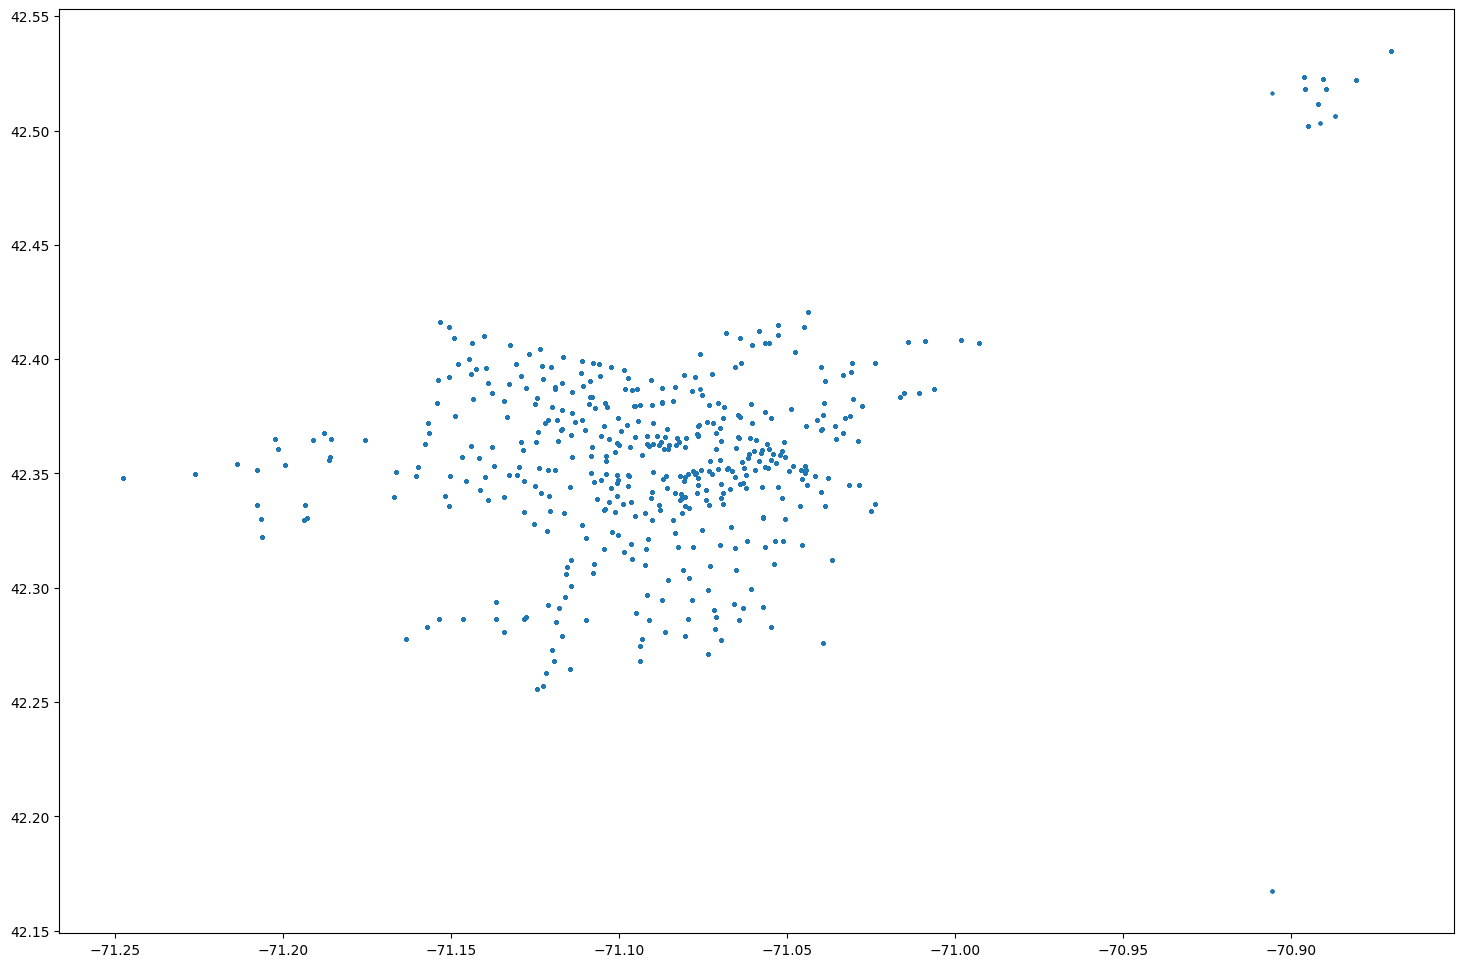

In [73]:
plt.figure(figsize=(18, 12))
plt.scatter(data_merge['start station longitude'], data_merge['start station latitude'],s=3)

#Mismas estaciones, por eso no se ven todas las calles
# IDEA: Ver trayectos empezando siempre desde una misma estacion con lineas

# plt.xlim((min(data_merge['start station longitude']), max(data_merge['start station latitude'])))
# plt.ylim((min(data_merge['start station longitude']), max(data_merge['start station latitude'])))

In [74]:
data_w['datetime']

0     2022-01-01
1     2022-01-02
2     2022-01-03
3     2022-01-04
4     2022-01-05
         ...    
238   2022-08-27
239   2022-08-28
240   2022-08-29
241   2022-08-30
242   2022-08-31
Name: datetime, Length: 243, dtype: datetime64[ns]

In [75]:
from datetime import date
group=pd.DataFrame(data_merge.groupby([data_merge['datetime'].dt.year,data_merge['datetime'].dt.month,data_merge['datetime'].dt.day]).datetime.count())
group
# data_merge['datetime'].unique()
group.index[1]
dic = {}
for i in range(len(group)):
    dic[date(*group.index[i])] = group.values[i][0]


df = pd.DataFrame(dic, index=[0])
df = df.T
df['datetime'] = df.index
df['datetime'] = pd.to_datetime(df['datetime'])


In [76]:
merge = data_w.merge(df, on='datetime', how='inner')
merge = merge.rename(columns = {0 : 'pickups'})
merge['is_Holiday'] = [ 1 if str(merge.iloc[i]['datetime'])[0:10] in nat_hol else 0 for i in range(len(merge))]
merge

,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,humidity,precip,precipprob,precipcover,snow,snowdepth,windspeed,cloudcover,visibility,icon,pickups,is_Holiday
0,2022-01-01,10.7,6.8,8.3,10.7,5.0,7.6,98.2,1.225,100,29.17,0.0,0.0,11.0,100.0,3.0,rain,2123,1
1,2022-01-02,7.9,1.1,6.1,7.3,-3.5,3.6,90.0,5.814,100,50.00,0.0,0.0,27.5,95.1,7.3,rain,1940,0
2,2022-01-03,0.6,-5.0,-2.8,-4.7,-12.4,-9.2,52.0,0.000,0,0.00,0.0,0.0,28.9,94.9,16.0,cloudy,2624,0
3,2022-01-04,-0.6,-8.3,-4.5,-3.9,-16.3,-10.0,43.2,0.000,0,0.00,0.0,0.0,23.8,26.8,16.0,partly-cloudy-day,2686,0
4,2022-01-05,10.6,-3.1,5.0,10.6,-8.3,1.9,84.1,3.209,100,29.17,0.0,0.0,31.0,85.9,15.3,rain,2617,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237,2022-08-27,25.0,20.6,21.9,25.0,20.6,21.9,82.6,0.000,0,0.00,0.0,0.0,27.4,76.0,15.9,partly-cloudy-day,21555,0
238,2022-08-28,24.0,18.8,21.6,24.0,18.8,21.6,75.3,0.000,0,0.00,0.0,0.0,29.0,52.5,16.0,partly-cloudy-day,21985,0
239,2022-08-29,31.2,18.8,24.3,32.6,18.8,24.9,70.6,0.000,0,0.00,0.0,0.0,25.6,41.8,16.0,partly-cloudy-day,19600,0
240,2022-08-30,32.8,22.2,26.4,34.7,22.2,27.4,72.2,0.000,0,0.00,0.0,0.0,29.3,41.5,16.0,partly-cloudy-day,19911,0


## Day of the week

In [77]:
count = 6
merge['weekday'] = 0
for i in range(len(merge)):
    merge['weekday'][i] = count
    count +=1
    if count > 7:
        count = 1

merge

C:\Users\mirun\AppData\Local\Temp\ipykernel_20628\1692203957.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merge['weekday'][i] = count


,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,humidity,precip,precipprob,precipcover,snow,snowdepth,windspeed,cloudcover,visibility,icon,pickups,is_Holiday,weekday
0,2022-01-01,10.7,6.8,8.3,10.7,5.0,7.6,98.2,1.225,100,29.17,0.0,0.0,11.0,100.0,3.0,rain,2123,1,6
1,2022-01-02,7.9,1.1,6.1,7.3,-3.5,3.6,90.0,5.814,100,50.00,0.0,0.0,27.5,95.1,7.3,rain,1940,0,7
2,2022-01-03,0.6,-5.0,-2.8,-4.7,-12.4,-9.2,52.0,0.000,0,0.00,0.0,0.0,28.9,94.9,16.0,cloudy,2624,0,1
3,2022-01-04,-0.6,-8.3,-4.5,-3.9,-16.3,-10.0,43.2,0.000,0,0.00,0.0,0.0,23.8,26.8,16.0,partly-cloudy-day,2686,0,2
4,2022-01-05,10.6,-3.1,5.0,10.6,-8.3,1.9,84.1,3.209,100,29.17,0.0,0.0,31.0,85.9,15.3,rain,2617,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237,2022-08-27,25.0,20.6,21.9,25.0,20.6,21.9,82.6,0.000,0,0.00,0.0,0.0,27.4,76.0,15.9,partly-cloudy-day,21555,0,5
238,2022-08-28,24.0,18.8,21.6,24.0,18.8,21.6,75.3,0.000,0,0.00,0.0,0.0,29.0,52.5,16.0,partly-cloudy-day,21985,0,6
239,2022-08-29,31.2,18.8,24.3,32.6,18.8,24.9,70.6,0.000,0,0.00,0.0,0.0,25.6,41.8,16.0,partly-cloudy-day,19600,0,7
240,2022-08-30,32.8,22.2,26.4,34.7,22.2,27.4,72.2,0.000,0,0.00,0.0,0.0,29.3,41.5,16.0,partly-cloudy-day,19911,0,1


## MEAN OF NAT_HOL

In [78]:
mean_no_hol = merge.loc[merge['is_Holiday'] == 0].pickups.mean()
mean_hol = merge.loc[merge['is_Holiday'] == 1].pickups.mean()
weekend_mean = merge.loc[(merge['weekday'] == 5) | (merge['weekday'] == 6) | (merge['weekday'] == 7)].pickups.mean()
weekday_mean = merge.loc[(merge['weekday'] == 1) | (merge['weekday'] == 2) | (merge['weekday'] == 3) | (merge['weekday'] == 4)].pickups.mean()
print(weekend_mean, weekday_mean, mean_hol,mean_no_hol)


9294.903846153846 9703.369565217392 8186.2 9585.659482758621


<AxesSubplot: title={'center': 'pickups'}, xlabel='is_Holiday'>

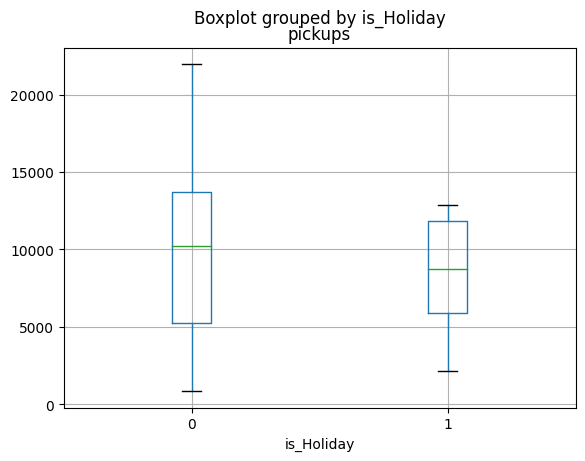

In [79]:
# merge.boxplot(merge[merge['is_Holiday'] == 1].pickups)
merge.boxplot(by='is_Holiday', column=['pickups'])

<AxesSubplot: title={'center': 'pickups'}, xlabel='weekday'>

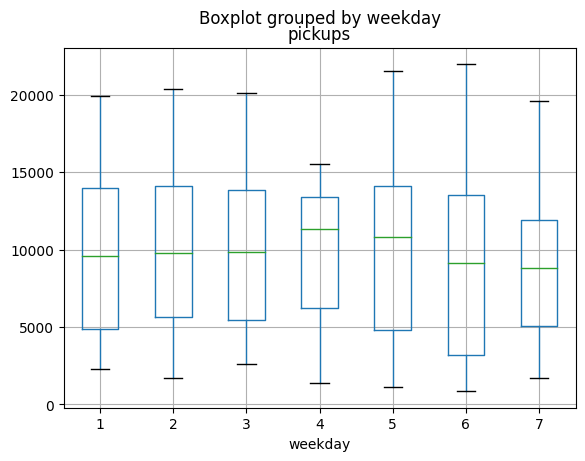

In [80]:
merge.boxplot(by='weekday', column=['pickups'])


C:\Users\mirun\AppData\Local\Temp\ipykernel_20628\3816422069.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = merge.corr()


<AxesSubplot: >

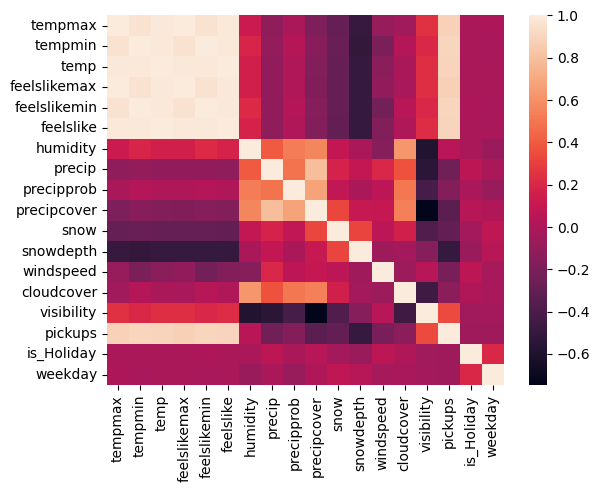

In [81]:
import seaborn as sns
corr = merge.corr()
sns.heatmap(corr)


## CLUSTER OF STATIONS

In [82]:
len(data_merge['start station id'].unique())


442

In [83]:
data_merge

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,...,humidity,precip,precipprob,precipcover,snow,snowdepth,windspeed,cloudcover,visibility,icon
0,597,2022-01-01 00:00:25.166,2022-01-01 00:10:22.1920,178,MIT Pacific St at Purrington St,42.359573,-71.101295,74,Harvard Square at Mass Ave/ Dunster,42.373268,...,98.2,1.225,100,29.17,0.0,0.0,11.0,100.0,3.0,rain
1,411,2022-01-01 00:00:40.430,2022-01-01 00:07:32.1980,189,Kendall T,42.362428,-71.084955,178,MIT Pacific St at Purrington St,42.359573,...,98.2,1.225,100,29.17,0.0,0.0,11.0,100.0,3.0,rain
2,476,2022-01-01 00:00:54.818,2022-01-01 00:08:51.6680,94,Main St at Austin St,42.375603,-71.064608,356,Charlestown Navy Yard,42.374125,...,98.2,1.225,100,29.17,0.0,0.0,11.0,100.0,3.0,rain
3,466,2022-01-01 00:01:01.608,2022-01-01 00:08:48.2350,94,Main St at Austin St,42.375603,-71.064608,356,Charlestown Navy Yard,42.374125,...,98.2,1.225,100,29.17,0.0,0.0,11.0,100.0,3.0,rain
4,752,2022-01-01 00:01:06.052,2022-01-01 00:13:38.2300,19,Park Dr at Buswell St,42.347241,-71.105301,41,Packard's Corner - Commonwealth Ave at Brighto...,42.352261,...,98.2,1.225,100,29.17,0.0,0.0,11.0,100.0,3.0,rain
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2305730,591,2022-08-31 23:59:44.919,2022-09-01 00:09:36.0490,67,MIT at Mass Ave / Amherst St,42.358100,-71.093198,84,CambridgeSide Galleria - CambridgeSide PL at L...,42.367074,...,63.1,8.351,100,16.67,0.0,0.0,31.6,49.3,16.0,rain
2305731,631,2022-08-31 23:59:45.729,2022-09-01 00:10:17.2070,380,Mass Ave at Albany St,42.361358,-71.096703,381,Inman Square at Springfield St.,42.374267,...,63.1,8.351,100,16.67,0.0,0.0,31.6,49.3,16.0,rain
2305732,521,2022-08-31 23:59:48.608,2022-09-01 00:08:30.3250,150,State Street at Channel Center,42.344137,-71.052608,26,Washington St at Waltham St,42.341575,...,63.1,8.351,100,16.67,0.0,0.0,31.6,49.3,16.0,rain
2305733,5908,2022-08-31 23:59:58.665,2022-09-01 01:38:27.4930,105,Lower Cambridgeport at Magazine St / Riverside Rd,42.357219,-71.113872,374,Tremont St at Hamilton Pl,42.356683,...,63.1,8.351,100,16.67,0.0,0.0,31.6,49.3,16.0,rain


In [96]:
##data management
data_stations = data_merge.copy()
coordinates = data_stations[['start station longitude', 'start station latitude','start station id']]
coordinates



,start station longitude,start station latitude,start station id
0,-71.101295,42.359573,178
1,-71.084955,42.362428,189
2,-71.064608,42.375603,94
3,-71.064608,42.375603,94
4,-71.105301,42.347241,19
...,...,...,...
2305730,-71.093198,42.358100,67
2305731,-71.096703,42.361358,380
2305732,-71.052608,42.344137,150
2305733,-71.113872,42.357219,105


In [97]:
len(coordinates['start station latitude'].unique())

460

In [98]:
from sklearn.cluster import KMeans
K = 5
k=KMeans(K)

In [99]:
k.fit(coordinates)
coordinates['cluster']=k.fit_predict(coordinates)


C:\Users\mirun\AppData\Local\Temp\ipykernel_20628\619108423.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coordinates['cluster']=k.fit_predict(coordinates)


In [100]:
coordinates

,start station longitude,start station latitude,start station id,cluster
0,-71.101295,42.359573,178,2
1,-71.084955,42.362428,189,2
2,-71.064608,42.375603,94,4
3,-71.064608,42.375603,94,4
4,-71.105301,42.347241,19,0
...,...,...,...,...
2305730,-71.093198,42.358100,67,4
2305731,-71.096703,42.361358,380,1
2305732,-71.052608,42.344137,150,2
2305733,-71.113872,42.357219,105,4


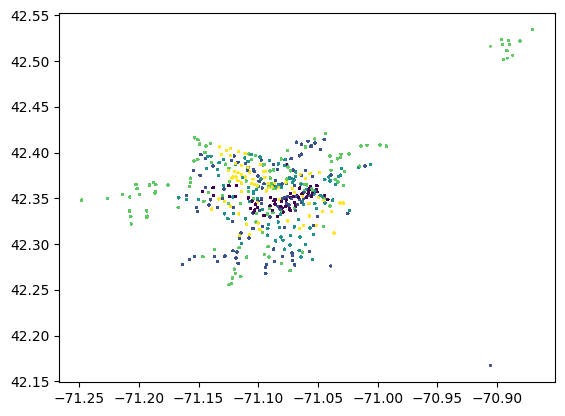

In [101]:
plt.scatter(coordinates['start station longitude'],coordinates['start station latitude'], 
s=0.5,c=coordinates.cluster)


In [89]:
len(k.labels_)

230573

In [90]:
from sklearn.cluster import DBSCAN
dbs = DBSCAN(min_samples=1000, eps=0.001)
dbs.fit(coordinates)

KeyboardInterrupt: 

In [ ]:
len(dbs.labels_)

230573

In [ ]:
data_stations

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,...,humidity,precip,precipprob,precipcover,snow,snowdepth,windspeed,cloudcover,visibility,icon
0,597,2022-01-01 00:00:25.166,2022-01-01 00:10:22.1920,178,MIT Pacific St at Purrington St,42.359573,-71.101295,74,Harvard Square at Mass Ave/ Dunster,42.373268,...,98.2,1.225,100,29.17,0.0,0.0,11.0,100.0,3.0,rain
1,411,2022-01-01 00:00:40.430,2022-01-01 00:07:32.1980,189,Kendall T,42.362428,-71.084955,178,MIT Pacific St at Purrington St,42.359573,...,98.2,1.225,100,29.17,0.0,0.0,11.0,100.0,3.0,rain
2,476,2022-01-01 00:00:54.818,2022-01-01 00:08:51.6680,94,Main St at Austin St,42.375603,-71.064608,356,Charlestown Navy Yard,42.374125,...,98.2,1.225,100,29.17,0.0,0.0,11.0,100.0,3.0,rain
3,466,2022-01-01 00:01:01.608,2022-01-01 00:08:48.2350,94,Main St at Austin St,42.375603,-71.064608,356,Charlestown Navy Yard,42.374125,...,98.2,1.225,100,29.17,0.0,0.0,11.0,100.0,3.0,rain
4,752,2022-01-01 00:01:06.052,2022-01-01 00:13:38.2300,19,Park Dr at Buswell St,42.347241,-71.105301,41,Packard's Corner - Commonwealth Ave at Brighto...,42.352261,...,98.2,1.225,100,29.17,0.0,0.0,11.0,100.0,3.0,rain
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2305730,591,2022-08-31 23:59:44.919,2022-09-01 00:09:36.0490,67,MIT at Mass Ave / Amherst St,42.358100,-71.093198,84,CambridgeSide Galleria - CambridgeSide PL at L...,42.367074,...,63.1,8.351,100,16.67,0.0,0.0,31.6,49.3,16.0,rain
2305731,631,2022-08-31 23:59:45.729,2022-09-01 00:10:17.2070,380,Mass Ave at Albany St,42.361358,-71.096703,381,Inman Square at Springfield St.,42.374267,...,63.1,8.351,100,16.67,0.0,0.0,31.6,49.3,16.0,rain
2305732,521,2022-08-31 23:59:48.608,2022-09-01 00:08:30.3250,150,State Street at Channel Center,42.344137,-71.052608,26,Washington St at Waltham St,42.341575,...,63.1,8.351,100,16.67,0.0,0.0,31.6,49.3,16.0,rain
2305733,5908,2022-08-31 23:59:58.665,2022-09-01 01:38:27.4930,105,Lower Cambridgeport at Magazine St / Riverside Rd,42.357219,-71.113872,374,Tremont St at Hamilton Pl,42.356683,...,63.1,8.351,100,16.67,0.0,0.0,31.6,49.3,16.0,rain


In [ ]:
import random
from matplotlib import colors as mcolors

num_colors=len(set(k.labels_))-1   #it's the number of different labels except for 1 (the -1 label)
colors=list(mcolors.BASE_COLORS.keys())
cluster_colors=random.choices(colors, k=num_colors)
x_=[]
y_=[]
c_=[]
for label, x, y in zip(k.labels_, coordinates['start station longitude'],coordinates['start station latitude']):
    if label==-1:
        continue
    x_.append(x)
    y_.append(y)
    c_.append(cluster_colors[label])
plt.figure(figsize=(18, 12))
plt.scatter(x_,y_,s=5,c=c_)



IndexError: list index out of range

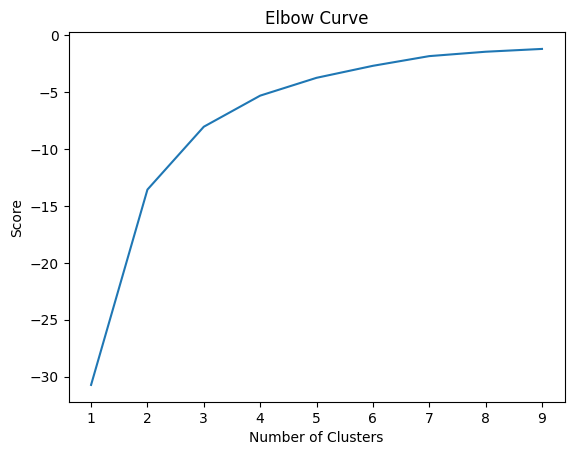

In [ ]:
data_stations = data_merge.copy()
coordinates = data_stations[['start station longitude', 'start station latitude']][:int(len(data_stations)/20)]
coordinates = coordinates.reset_index()
K_clusters = range(1,10)
kmeans = [KMeans(n_clusters=i) for i in K_clusters]
Y_axis = coordinates[['start station latitude']]
X_axis = coordinates[['start station longitude']]
score = [kmeans[i].fit(Y_axis).score(Y_axis) for i in range(len(kmeans))]
# Visualize
plt.plot(K_clusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [ ]:

kmeans = KMeans(n_clusters = 4, init ='k-means++')
kmeans.fit(coordinates) # Compute k-means clustering.
coordinates['cluster_label'] = kmeans.fit_predict(coordinates)
centers = kmeans.cluster_centers_ # Coordinates of cluster centers.


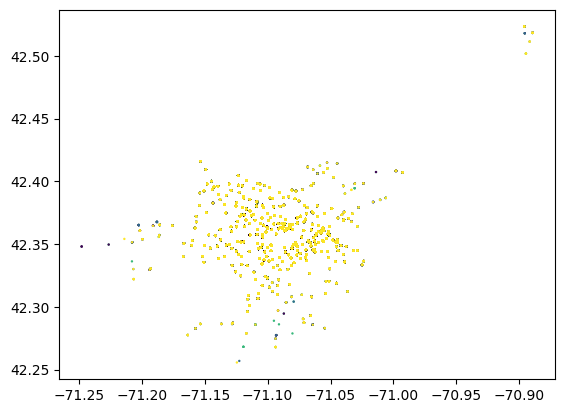

In [ ]:
plt.scatter(coordinates['start station longitude'],coordinates['start station latitude'], c=kmeans.labels_, s=0.5)

## DIMENSIONALITY REDUCTION / CLUSTER 

1. Normalizar datos
2. Reducir dimensiones
3. Elbow method
3. Clusters con y sin fit_transform
4. Mapa de estaciones con clusters, seasonal clusters (nb 7), media de vbariables por cada cluster

<!-- HACER PREDICCIONES POR CADA ESTACION -->

In [ ]:
from sklearn import decomposition
pca=decomposition.PCA()


In [ ]:
data_merge.columns

Index(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'postal code', 'is_Holiday', 'datetime', 'tempmax', 'tempmin', 'temp',
       'feelslikemax', 'feelslikemin', 'feelslike', 'humidity', 'precip',
       'precipprob', 'precipcover', 'snow', 'snowdepth', 'windspeed',
       'cloudcover', 'visibility', 'icon'],
      dtype='object')

In [ ]:
col_drop=['start station id', 'end station id', 'stoptime', 'start station name','end station name','postal code', 'bikeid','icon','datetime']
data_merge = data_merge.drop(columns=col_drop)

In [ ]:
data_merge = data_merge.set_index('starttime')

In [ ]:
data_merge = pd.get_dummies(data_merge, columns=['usertype'])

In [ ]:
data_clustering = data_merge.copy()
data_clustering.columns

Index(['tripduration', 'start station latitude', 'start station longitude',
       'end station latitude', 'end station longitude', 'is_Holiday',
       'tempmax', 'tempmin', 'temp', 'feelslikemax', 'feelslikemin',
       'feelslike', 'humidity', 'precip', 'precipprob', 'precipcover', 'snow',
       'snowdepth', 'windspeed', 'cloudcover', 'visibility',
       'usertype_Customer', 'usertype_Subscriber'],
      dtype='object')

In [ ]:
col_std = ['tripduration', 'start station latitude', 'start station longitude',
       'end station latitude', 'end station longitude', 
       'tempmax', 'tempmin', 'temp', 'feelslikemax', 'feelslikemin',
       'feelslike', 'humidity', 'precip', 'precipprob', 'precipcover', 'snow',
       'snowdepth', 'windspeed', 'cloudcover', 'visibility']

data_clustering[col_std]= (data_clustering[col_std] - data_clustering[col_std].mean()) / data_clustering[col_std].std()
data_clustering

,tripduration,start station latitude,start station longitude,end station latitude,end station longitude,is_Holiday,tempmax,tempmin,temp,feelslikemax,...,precip,precipprob,precipcover,snow,snowdepth,windspeed,cloudcover,visibility,usertype_Customer,usertype_Subscriber
starttime,,,,,,,,,,,,,,,,,,,,,
2022-01-01 00:00:25.166,-0.045072,0.064725,-0.398505,0.797121,-1.011867,1,-1.221514,-0.745320,-1.045194,-1.077116,...,-0.016212,1.310643,1.958670,-0.118138,-0.218786,-2.555912,1.670223,-6.783122,0,1
2022-01-01 00:00:40.430,-0.052832,0.217052,0.176596,0.069718,-0.404997,1,-1.221514,-0.745320,-1.045194,-1.077116,...,-0.016212,1.310643,1.958670,-0.118138,-0.218786,-2.555912,1.670223,-6.783122,0,1
2022-01-01 00:00:54.818,-0.050120,0.920095,0.892718,0.842617,1.227067,1,-1.221514,-0.745320,-1.045194,-1.077116,...,-0.016212,1.310643,1.958670,-0.118138,-0.218786,-2.555912,1.670223,-6.783122,1,0
2022-01-01 00:01:01.608,-0.050538,0.920095,0.892718,0.842617,1.227067,1,-1.221514,-0.745320,-1.045194,-1.077116,...,-0.016212,1.310643,1.958670,-0.118138,-0.218786,-2.555912,1.670223,-6.783122,1,0
2022-01-01 00:01:06.052,-0.038605,-0.593338,-0.539508,-0.318672,-1.196271,1,-1.221514,-0.745320,-1.045194,-1.077116,...,-0.016212,1.310643,1.958670,-0.118138,-0.218786,-2.555912,1.670223,-6.783122,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-31 23:59:44.919,-0.045322,-0.013887,-0.113532,0.468129,0.455297,0,0.817818,1.063205,0.898521,0.773319,...,2.066967,1.310643,0.885671,-0.118138,-0.218786,0.413943,-0.723590,0.373149,0,1
2022-08-31 23:59:45.729,-0.043653,0.159984,-0.236885,0.850191,-0.368833,0,0.817818,1.063205,0.898521,0.773319,...,2.066967,1.310643,0.885671,-0.118138,-0.218786,0.413943,-0.723590,0.373149,0,1
2022-08-31 23:59:48.608,-0.048243,-0.758971,1.315068,-0.886277,0.732267,0,0.817818,1.063205,0.898521,0.773319,...,2.066967,1.310643,0.885671,-0.118138,-0.218786,0.413943,-0.723590,0.373149,0,1


In [ ]:
pca.fit(data_clustering)

PCA()

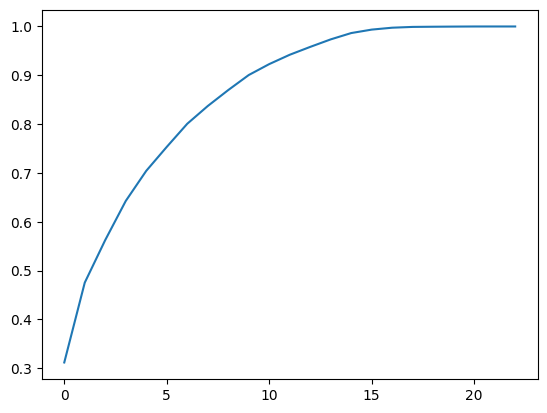

In [ ]:
np.sum(pca.explained_variance_ratio_)
expl=pca.explained_variance_ratio_
cdf=[sum(expl[:i+1]) for i in range(len(expl))]
plt.plot(range(len(expl)), cdf)

Text(0.5, 1.0, 'cumsum(pca.explained_variance_ratio_)')

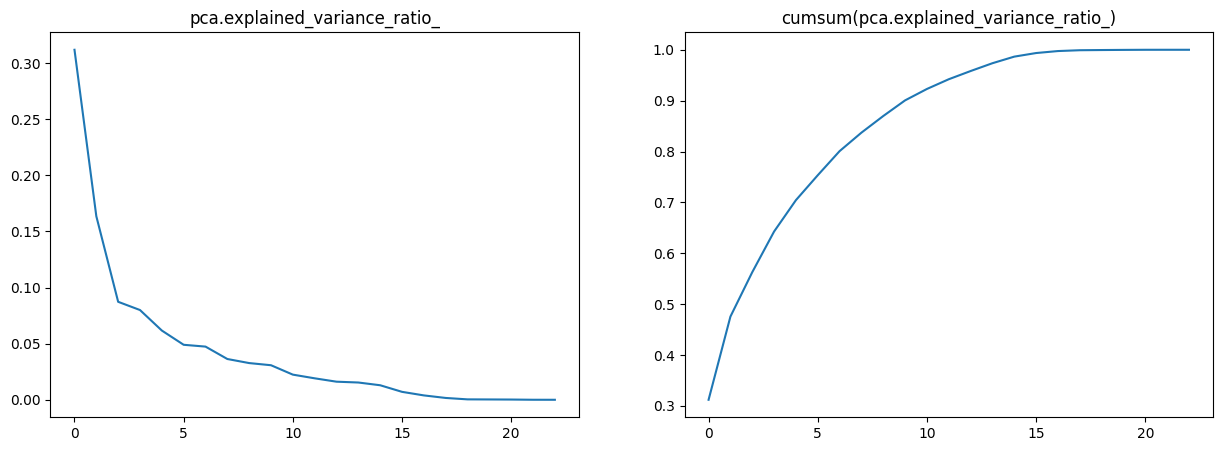

In [ ]:
# Or more simple
fig=plt.figure(figsize=(15, 5))
ax1=fig.add_subplot(121)
ax1.plot(expl)
plt.title("pca.explained_variance_ratio_")

ax2=fig.add_subplot(122)
plt.plot(np.cumsum(expl))
plt.title("cumsum(pca.explained_variance_ratio_)")

In [ ]:
num=np.where(np.cumsum(expl)>.8)[0][0]+1
print('The number of required vectors is %d' %num ,'to explain 80 percent of the variance') 

The number of required vectors is 7 to explain 80 percent of the variance


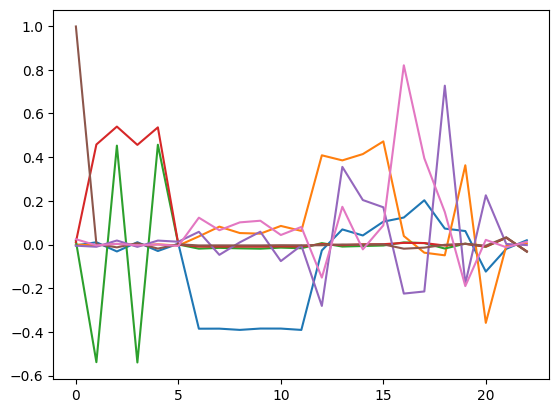

In [ ]:
for eigenvector in pca.components_[:7]:
    plt.plot(range(len(eigenvector)), eigenvector)

In [ ]:
pca_new=decomposition.PCA(n_components=7)
pca_new.fit(data_clustering)

PCA(n_components=7)

In [ ]:
reduced=pca_new.transform(data_clustering)
reduced.shape

(2305735, 7)

In [ ]:
pca_2 = decomposition.PCA(n_components=2)
pca_2_result = pca_2.fit_transform(data_clustering)

## CLUSTERING

In [ ]:
from sklearn.cluster import KMeans


In [ ]:
## ELBOW METHOD
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(reduced)
    distortions.append(kmeanModel.inertia_)

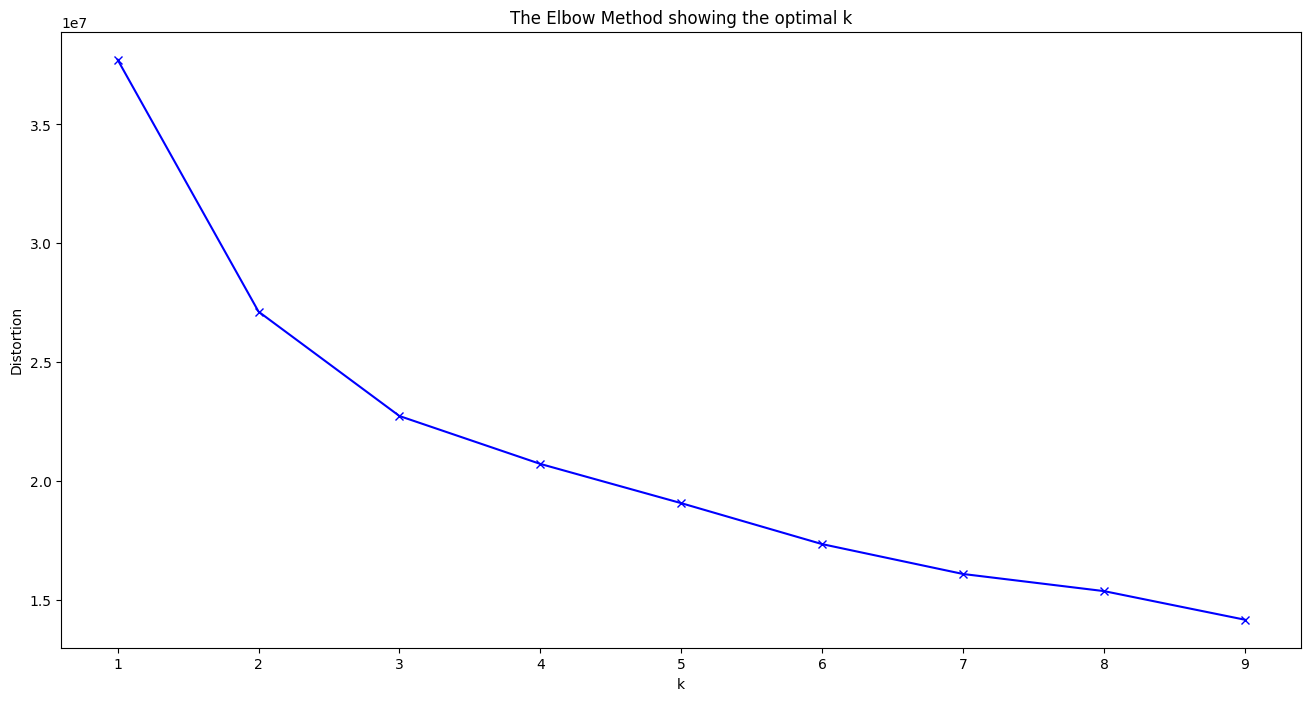

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [ ]:
km = KMeans(n_clusters=3)
km.fit(reduced)

KMeans(n_clusters=3)

In [ ]:
clustered = km.fit_predict(reduced)

In [ ]:
data_clustering['cluster'] = clustered
data_clustering['cluster'].unique()


array([1, 2, 0])

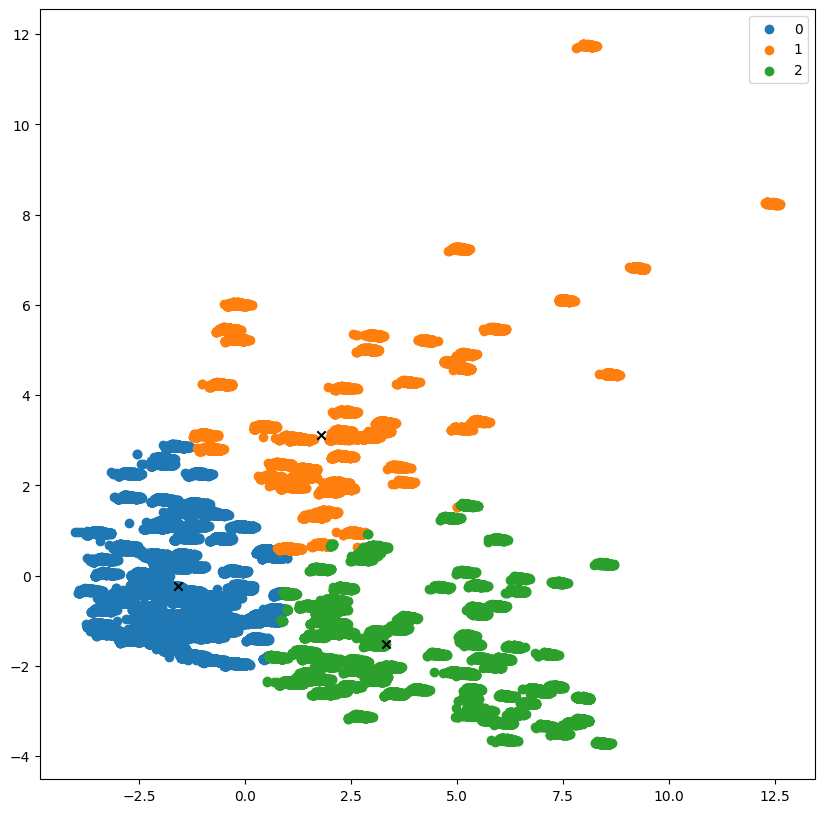

In [ ]:
centroids = km.cluster_centers_
# plt.plot(centroids)
plt.figure(figsize=(10,10))
uniq = np.unique(clustered)
for i in uniq:
   plt.scatter( pca_2_result[clustered == i , 0] , pca_2_result[clustered == i , 1] , label = i)
plt.scatter(centroids[:,0], centroids[:,1], marker="x", color='k')
#This is done to find the centroid for each clusters.
plt.legend()
plt.show()

## Clustering wheather icons

In [ ]:
data_w_cluster = data_merge.copy()


In [ ]:
data_w_cluster.columns

Index(['tripduration', 'start station latitude', 'start station longitude',
       'end station latitude', 'end station longitude', 'is_Holiday',
       'tempmax', 'tempmin', 'temp', 'feelslikemax', 'feelslikemin',
       'feelslike', 'humidity', 'precip', 'precipprob', 'precipcover', 'snow',
       'snowdepth', 'windspeed', 'cloudcover', 'visibility',
       'usertype_Customer', 'usertype_Subscriber'],
      dtype='object')